In [1]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.pyplot as plt
import numpy as np

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


/tmp/ipykernel_3610924/4079869577.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

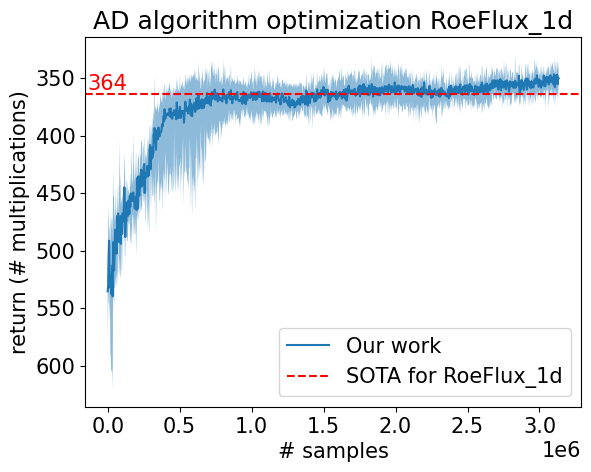

In [2]:

font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 
l = 1000 # 1500

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:l, 0]*32*98 
								num_muls = data[:l, 1]
								print(num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)

fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-364., color="r", linestyle="--", label="SOTA for RoeFlux_1d")
ax.annotate("364", (num_samples[0], -364), textcoords="offset points", xytext=(0, 3), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization RoeFlux_1d")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [3]:
from graphax.perf import plot_performance_with_GNN, measure
from graphax.examples import RoeFlux_1d

In [4]:
# 320 mults
order = [8, 82, 27, 66, 7, 78, 76, 13, 48, 42, 68, 86, 95, 4, 59, 28, 77, 54, 1, 
         94, 5, 58, 72, 93, 75, 31, 53, 33, 57, 90, 44, 25, 89, 88, 84, 96, 74, 
         92, 83, 91, 45, 51, 81, 80, 11, 10, 85, 43, 22, 73, 19, 71, 6, 18, 17, 
         79, 47, 50, 52, 21, 37, 38, 55, 49, 69, 35, 65, 29, 64, 16, 9, 60, 15, 
         61, 23, 87, 70, 67, 24, 46, 63, 39, 2, 62, 3, 41, 40, 32, 26, 34, 56, 
         30, 14, 98, 36, 12, 20, 100] 

order_GNN = [
    50, 93, 84, 48, 27, 33, 91, 5, 38, 25, 4, 26, 98, 92, 44, 9, 69, 16, 75, 78, 
    86, 100, 31, 28, 17, 8, 13, 54, 80, 45, 35, 2, 88, 10, 90, 43, 76, 21, 18, 
    47, 87, 67, 83, 7, 96, 68, 60, 1, 74, 19, 57, 85, 11, 53, 81, 95, 42, 72, 34, 
    22, 63, 56, 32, 65, 37, 71, 73, 61, 64, 77, 39, 6, 14, 3, 82, 40, 59, 29, 89, 
    94, 62, 79, 70, 66, 51, 58, 55, 52, 24, 46, 41, 49, 23, 36, 12, 30, 15, 20
] # 296 muls

# Minimal markowitz order:
mM_order = [4, 5, 8, 9, 16, 17, 25, 27, 31, 33, 38, 43, 44, 45, 69, 84, 1, 2,
            10, 13, 18, 21, 26, 28, 32, 34, 37, 39, 42, 47, 50, 53, 57, 59, 
            62, 64, 66, 67, 68, 71, 73, 75, 76, 77, 80, 81, 83, 85, 86, 87, 
            91, 92, 95, 11, 14, 19, 22, 51, 54, 58, 60, 63, 65, 72, 79, 88, 
            90, 93, 96, 3, 6, 7, 15, 29, 40, 56, 61, 74, 78, 82, 48, 89, 94, 
            23, 35, 46, 24, 70, 41, 98, 100, 12, 20, 30, 49, 52, 55, 36]

In [5]:
shape = (512,)
key = jrand.PRNGKey(1234)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
_, median, error = measure(RoeFlux_1d, xs, samplesize=1000)
median, error

100%|██████████| 1000/1000 [00:00<00:00, 11490.61it/s]


(Array(0.02974505, dtype=float32),
 Array([-0.00150206,  0.00545195], dtype=float32))

100%|██████████| 1000/1000 [00:01<00:00, 920.82it/s]
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family '

fwd median: 0.674856424331665, rev median: 0.7015515565872192, mM median: 0.7119019031524658, cc median: 0.7516924142837524, GNN median: 0.7390578985214233
fwd err: [-0.06568992  0.22574258], rev err: [-0.09418708  0.20746684], mM err: [-0.09538424  0.23923206], cc err: [-0.15287572  0.20555419], GNN err: [-0.11450481  0.2669133 ]


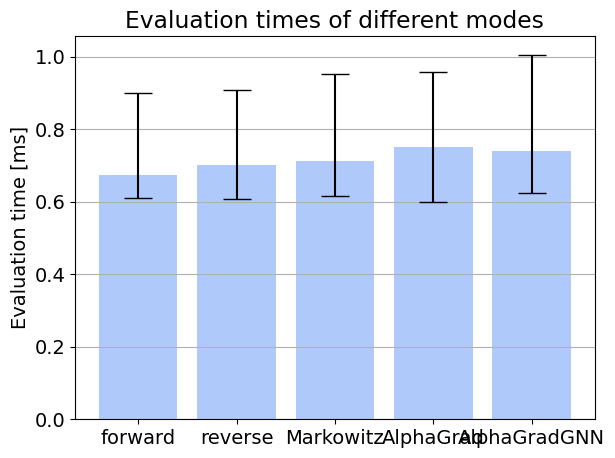

In [ ]:
shape = (512,)
key = jrand.PRNGKey(1234)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance_with_GNN(RoeFlux_1d, xs, order, order_GNN,  mM_order, "./RoeFlux.png", samplesize=1000)

  0%|          | 0/110 [00:00<?, ?it/s]

100%|██████████| 110/110 [00:14<00:00,  7.70it/s]
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'nor

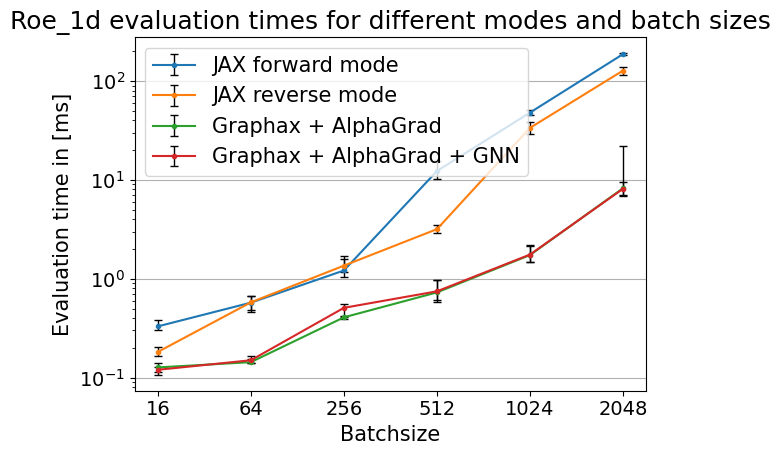

In [9]:
from graphax.perf import plot_performance_over_size_jax_GNN

shapes = (16, 64, 256, 512, 1024, 2048)
key = jrand.PRNGKey(1234)
xs = [.01, .02, .02, .01, .03, .03]
xs = [[jrand.uniform(key, (shape,))*x for x in xs] for shape in shapes]
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax_GNN(RoeFlux_1d, xs, order, order_GNN, "Roe_1d", ticks=shapes, samplesize=110)